### Week 1 - PROJECT INITIALIZATION & DATASET SETUP

### Step 1 : Import libarires & Check Enviornment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
file_path = r"D:\Infyos Springboard\Indian_Kids_Screen_Time.csv"

# Load dataset
df = pd.read_csv(file_path)

print(" Dataset loaded successfully!")
print(f"Shape (rows, columns): {df.shape}")
df.head(5)


 Dataset loaded successfully!
Shape (rows, columns): (9712, 8)


Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     Poor Sleep, Anxiety          Urban

In [7]:
print("DataFrame Info:")
df.info()
df.describe(include='all')

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


Age Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
count   9712.000000   9712               9712.000000           9712   
unique          NaN      2                       NaN              4   
top             NaN   Male                       NaN     Smartphone   
freq            NaN   4942                       NaN           4568   
mean      12.979201    NaN                  4.352837            NaN   
std        3.162437    NaN                  1.718232            NaN   
min        8.000000    NaN                  0.000000            NaN   
25%       10.000000    NaN                  3.410000            NaN   
50%       13.000000    NaN                  4.440000            NaN   
75%       16.000000    NaN                  5.380000            NaN   
max       18.000000    NaN                 13.890000            NaN   

       Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
count                        9712                        9712.000000   
unique                          2                                NaN   
top                          True                                NaN   
freq                         8301                                NaN   
mean                          NaN                           0.427226   
std                           NaN                           0.073221   
min                           NaN                           0.300000   
25%                           NaN                           0.370000   
50%                           NaN                           0.430000   
75%                           NaN                           0.480000   
max                           NaN                           0.600000   

       Health_Impacts Urban_or_Rural  
count            6494           9712  
unique             15              2  
top        Poor Sleep          Urban  
freq             2268           6851  
mean              NaN            NaN  
std               NaN            NaN  
min               NaN            NaN  
25%               NaN            NaN  
50%               NaN            NaN  
75%               NaN            NaN  
max               NaN            NaN

In [13]:
# Missing value summary
missing = df.isna().sum()
missing_percent = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "Missing_Count": missing,
    "Missing_%": missing_percent
})

print("Missing Values Summary:")
missing_df


Missing Values Summary:


Missing_Count  Missing_%
Age                                            0       0.00
Gender                                         0       0.00
Avg_Daily_Screen_Time_hr                       0       0.00
Primary_Device                                 0       0.00
Exceeded_Recommended_Limit                     0       0.00
Educational_to_Recreational_Ratio              0       0.00
Health_Impacts                              3218      33.13
Urban_or_Rural                                 0       0.00

In [15]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows Found: {duplicates}")

Duplicate Rows Found: 44


In [17]:
numeric_summary = df.describe().T
numeric_summary

count       mean       std  min    25%  \
Age                                9712.0  12.979201  3.162437  8.0  10.00   
Avg_Daily_Screen_Time_hr           9712.0   4.352837  1.718232  0.0   3.41   
Educational_to_Recreational_Ratio  9712.0   0.427226  0.073221  0.3   0.37   

                                     50%    75%    max  
Age                                13.00  16.00  18.00  
Avg_Daily_Screen_Time_hr            4.44   5.38  13.89  
Educational_to_Recreational_Ratio   0.43   0.48   0.60

In [19]:
col = "Avg_Daily_Screen_Time_hr"

if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print(df[col].describe())
    print("Values > 24 hours:", (df[col] > 24).sum())
    print("Values < 0 hours:", (df[col] < 0).sum())

count    9712.000000
mean        4.352837
std         1.718232
min         0.000000
25%         3.410000
50%         4.440000
75%         5.380000
max        13.890000
Name: Avg_Daily_Screen_Time_hr, dtype: float64
Values > 24 hours: 0
Values < 0 hours: 0


In [21]:
cat_cols = ['Gender', 'Primary_Device', 'Health_Impacts', 'Urban_or_Rural']

for col in cat_cols:
    if col in df.columns:
        print(f"\nTop values for {col}:")
        print(df[col].value_counts().head(10))



Top values for Gender:
Gender
Male      4942
Female    4770
Name: count, dtype: int64

Top values for Primary_Device:
Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

Top values for Health_Impacts:
Health_Impacts
Poor Sleep                              2268
Poor Sleep, Eye Strain                   979
Eye Strain                               644
Poor Sleep, Anxiety                      608
Poor Sleep, Obesity Risk                 452
Anxiety                                  385
Poor Sleep, Eye Strain, Anxiety          258
Obesity Risk                             252
Poor Sleep, Eye Strain, Obesity Risk     188
Eye Strain, Anxiety                      135
Name: count, dtype: int64

Top values for Urban_or_Rural:
Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64


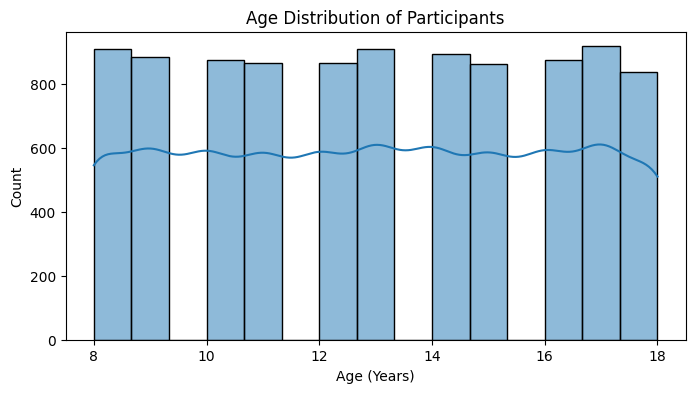

In [23]:
if 'Age' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['Age'], bins=15, kde=True)
    plt.title("Age Distribution of Participants")
    plt.xlabel("Age (Years)")
    plt.ylabel("Count")
    plt.show()


# Week 2 -- Preprocessing and Feature Engineering

In [26]:
# Identify missing values
print("\nMissing values before cleaning:")
print(df.isna().sum())


Missing values before cleaning:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64


In [28]:
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_10564\291025519.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10564\291025519.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

### Create screen category column

In [31]:
def categorize_screen_time(hours):
    if hours <= 2:
        return "Low"
    elif 2 < hours <= 5:
        return "Moderate"
    else:
        return "High"

df['Screen_Category'] = df['Avg_Daily_Screen_Time_hr'].apply(categorize_screen_time)


### Create Age Group column


In [34]:
def classify_age(age):
    if age <= 8:
        return "Child"
    elif 9 <= age <= 12:
        return "Pre-Teen"
    elif 13 <= age <= 17:
        return "Teenager"
    else:
        return "Young Adult"

df["Age_Group"] = df["Age"].apply(classify_age)

### Renaming of age_group names

In [37]:
def simplify_age_group(age_group):
    if age_group in ["Child", "Pre-Teen"]:
        return "Young"
    elif age_group == "Teenager":
        return "Adolescent"
    else:
        return "Adult"
df["Age_Band"] = df["Age_Group"].apply(simplify_age_group)


### Creat Screen Risk score

In [40]:
def screen_risk(row):
    base = row["Avg_Daily_Screen_Time_hr"]
    impact = str(row["Health_Impacts"]).lower()
    risk = base
    if "eye" in impact or "head" in impact or "sleep" in impact:
        risk += 2  # penalty for negative health impact
    if row["Exceeded_Recommended_Limit"]:
        risk += 1  # penalty for exceeding limit
    return min(risk, 10)  # keep it capped at 10

df["Screen_Risk_Score"] = df.apply(screen_risk, axis=1)

### Create Educational_percent Column

In [43]:
# Convert ratio to % of educational screen time
df["Educational_Percent"] = (df["Educational_to_Recreational_Ratio"] /
                             (1 + df["Educational_to_Recreational_Ratio"])) * 100


### Create Device share column

In [46]:

#  Device Share (% of users per device)
device_share = df["Primary_Device"].value_counts(normalize=True) * 100
df["Device_Share_%"] = df["Primary_Device"].map(device_share)

### Verifying added columns

In [49]:
print("\n New Columns Added:")
print(df[["Age", "Age_Group", "Avg_Daily_Screen_Time_hr",
          "Screen_Category", "Screen_Risk_Score", "Educational_Percent", "Device_Share_%"]].head())



 New Columns Added:
   Age    Age_Group  Avg_Daily_Screen_Time_hr Screen_Category  \
0   14     Teenager                      3.99        Moderate   
1   11     Pre-Teen                      4.61        Moderate   
2   18  Young Adult                      3.73        Moderate   
3   15     Teenager                      1.21             Low   
4   12     Pre-Teen                      5.89            High   

   Screen_Risk_Score  Educational_Percent  Device_Share_%  
0               6.99            29.577465       47.034596  
1               7.61            23.076923       14.754942  
2               6.73            24.242424       25.607496  
3               3.21            28.057554       14.754942  
4               8.89            32.885906       47.034596  


In [51]:
print("\nDescriptive Age Group Distribution:")
print(df["Age_Group"].value_counts())


Descriptive Age Group Distribution:
Age_Group
Teenager       4465
Pre-Teen       3495
Child           912
Young Adult     840
Name: count, dtype: int64


### Save enhanced dataset

In [54]:
output_path = r"D:\Infyos Springboard\Indian_Kids_Screen_Time_Enhanced.csv"
df.to_csv(output_path, index=False)
print(f"\n Enhanced dataset saved to: {output_path}")


 Enhanced dataset saved to: D:\Infyos Springboard\Indian_Kids_Screen_Time_Enhanced.csv


### Device Share Visualization

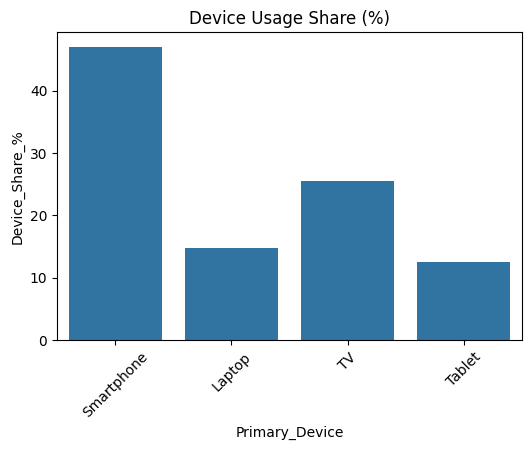

In [57]:
plt.figure(figsize=(6,4))
sns.barplot(x="Primary_Device", y="Device_Share_%", data=df)
plt.title("Device Usage Share (%)")
plt.xticks(rotation=45)
plt.show()

### Screen Time  Distribution

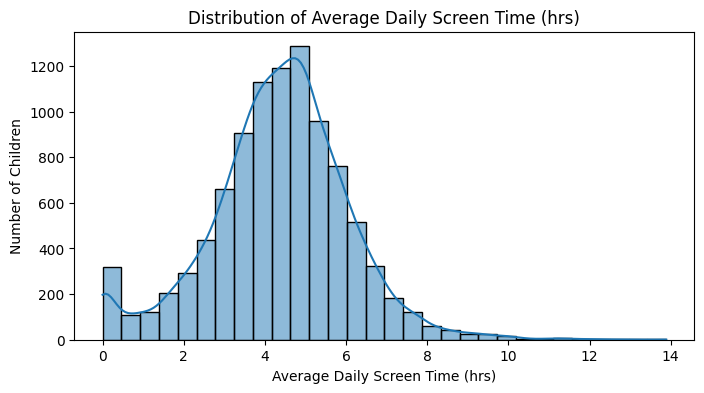

In [60]:
plt.figure(figsize=(8,4))
sns.histplot(df["Avg_Daily_Screen_Time_hr"], kde=True, bins=30)
plt.title("Distribution of Average Daily Screen Time (hrs)")
plt.xlabel("Average Daily Screen Time (hrs)")
plt.ylabel("Number of Children")
plt.show()


### Screen Time by Gender

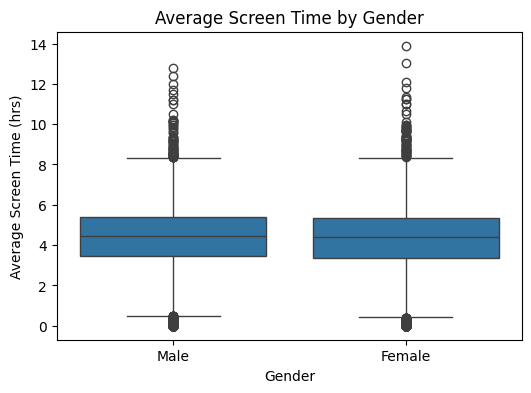

In [63]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender", y="Avg_Daily_Screen_Time_hr", data=df)
plt.title("Average Screen Time by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Screen Time (hrs)")
plt.show()


###  Screen time by Age Band

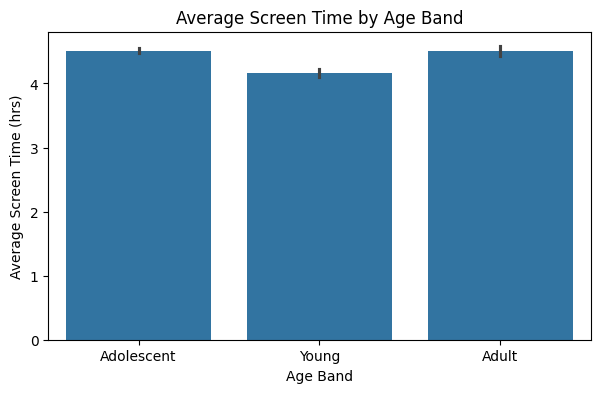

In [66]:
plt.figure(figsize=(7,4))
sns.barplot(x="Age_Band", y="Avg_Daily_Screen_Time_hr", data=df, estimator=np.mean)
plt.title("Average Screen Time by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Screen Time (hrs)")
plt.show()


### Primary Device Usage

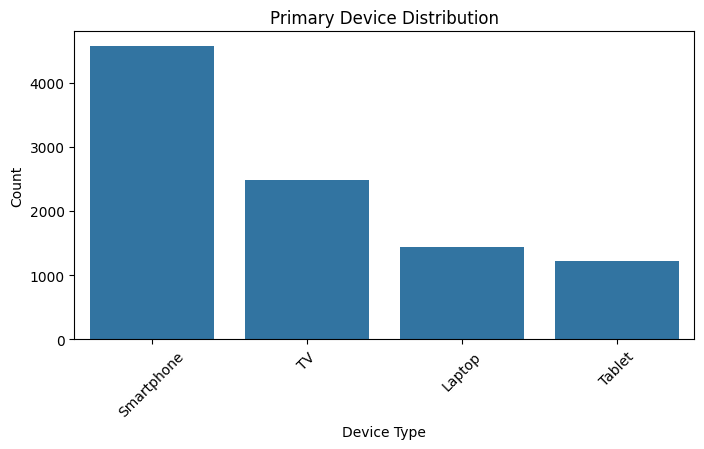

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(x="Primary_Device", data=df, order=df["Primary_Device"].value_counts().index)
plt.title("Primary Device Distribution")
plt.xlabel("Device Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### Screen Category vs Health Impacts

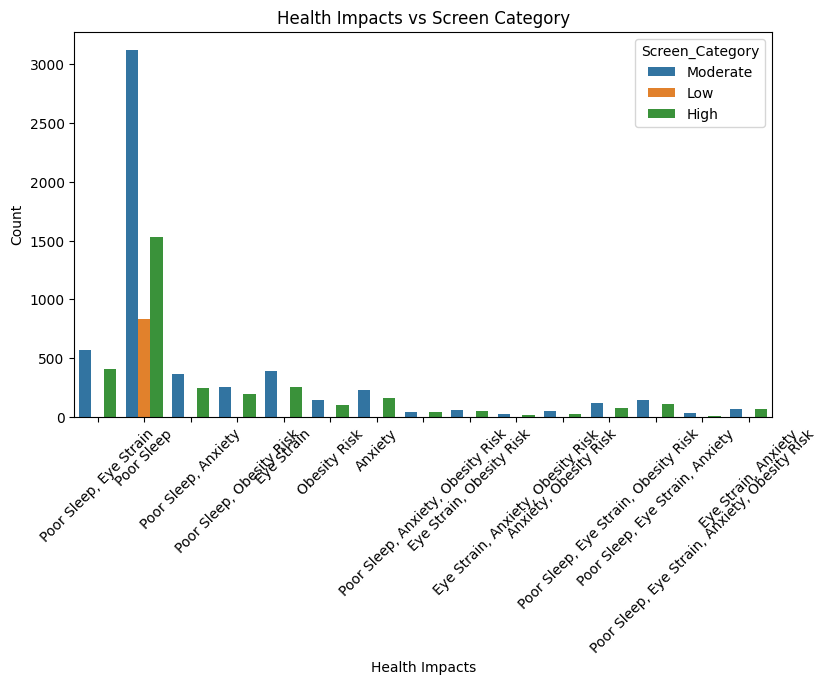

In [72]:
plt.figure(figsize=(9,5))
sns.countplot(x="Health_Impacts", hue="Screen_Category", data=df)
plt.title("Health Impacts vs Screen Category")
plt.xlabel("Health Impacts")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Screen Category vs Health Impacts

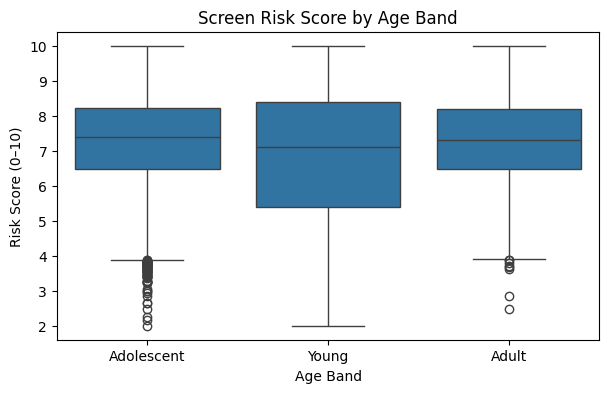

In [75]:
plt.figure(figsize=(7,4))
sns.boxplot(x="Age_Band", y="Screen_Risk_Score", data=df)
plt.title("Screen Risk Score by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Risk Score (0–10)")
plt.show()


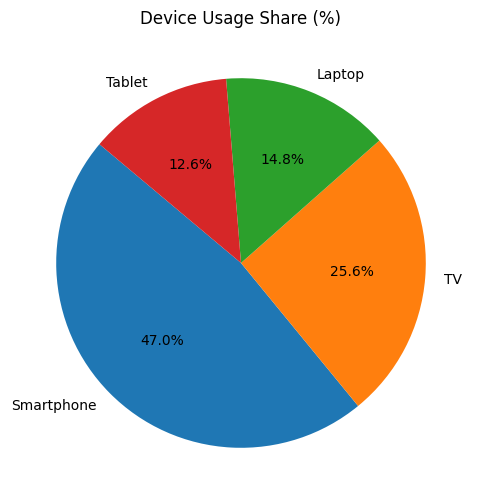

In [77]:
device_share = df["Primary_Device"].value_counts(normalize=True) * 100
plt.figure(figsize=(6,6))
plt.pie(device_share, labels=device_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Device Usage Share (%)")
plt.show()

### Count health issues

In [80]:
def count_health_issues(val):
    if pd.isna(val) or val.strip().lower() == "none":
        return 0
    else:
        return len([x.strip() for x in val.split(",")])

df["Health_Issue_Count"] = df["Health_Impacts"].apply(count_health_issues)


### Save the new dataset

In [ ]:
import os

# Define new filename to avoid overwriting
output_path = r"/content/Indian_Kids_Screen_Time_Final.csv"

# Ensure directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the dataframe
df.to_csv(output_path, index=False)

print(" Final enhanced dataset saved successfully!")
print(f"File Location: {output_path}")
print(f"Total Records: {df.shape[0]}, Columns: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())

## Milestone -- 02

### Week 03 & 04

### Univariate Analysis

#### 1. Distribution of Average Daily Screen Time

##### Shows how many kids fall under different screen time levels.

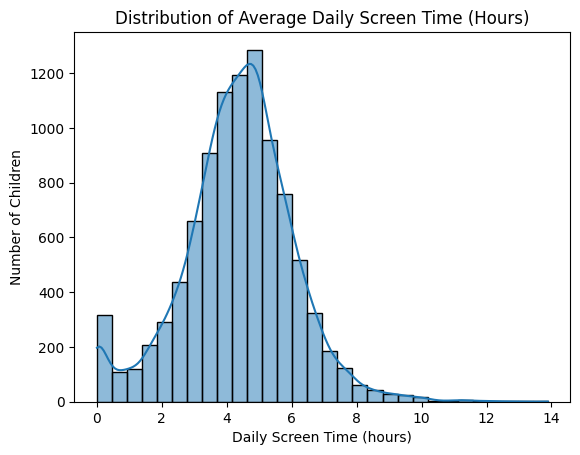

In [91]:
sns.histplot(df["Avg_Daily_Screen_Time_hr"], bins=30, kde=True)
plt.title("Distribution of Average Daily Screen Time (Hours)")
plt.xlabel("Daily Screen Time (hours)")
plt.ylabel("Number of Children")
plt.show()


#### 2. Distribution of Screen Categories

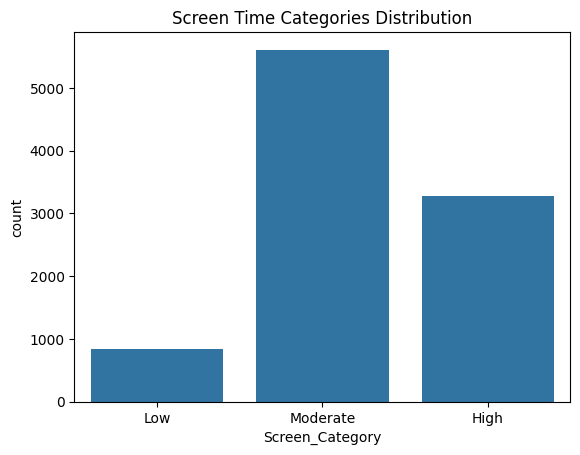

In [94]:
sns.countplot(x="Screen_Category", data=df, order=["Low","Moderate","High"])
plt.title("Screen Time Categories Distribution")
plt.show()


#### 3.Age Group Composition

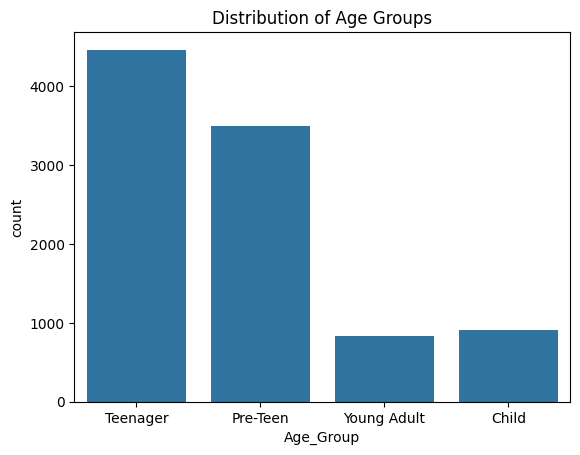

In [97]:
sns.countplot(x="Age_Group", data=df)
plt.title("Distribution of Age Groups")
plt.show()


#### 4.Primary Device Usage

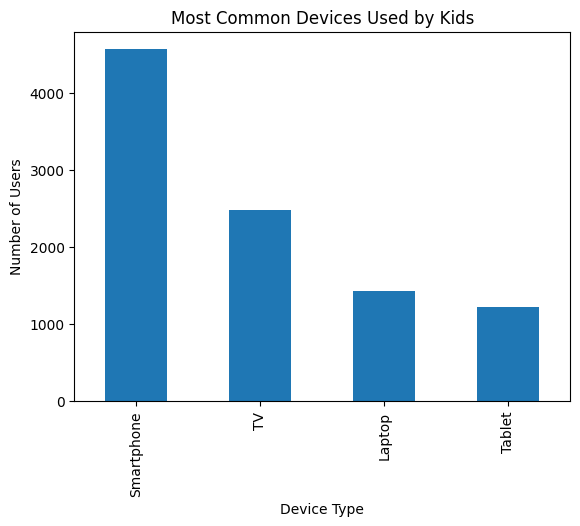

In [100]:
df["Primary_Device"].value_counts().plot(kind="bar")
plt.title("Most Common Devices Used by Kids")
plt.xlabel("Device Type")
plt.ylabel("Number of Users")
plt.show()

## Bivariate Visual Analysis (Two Variables)

#### 1. Screen Time by Age Group

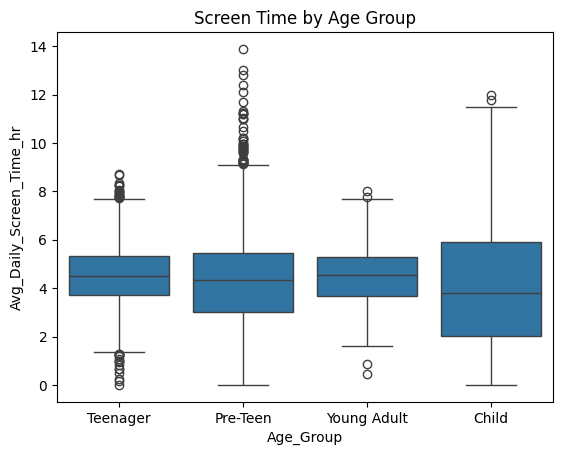

In [104]:
sns.boxplot(x="Age_Group", y="Avg_Daily_Screen_Time_hr", data=df)
plt.title("Screen Time by Age Group")
plt.show()

#### 2.Screen Category by Gender

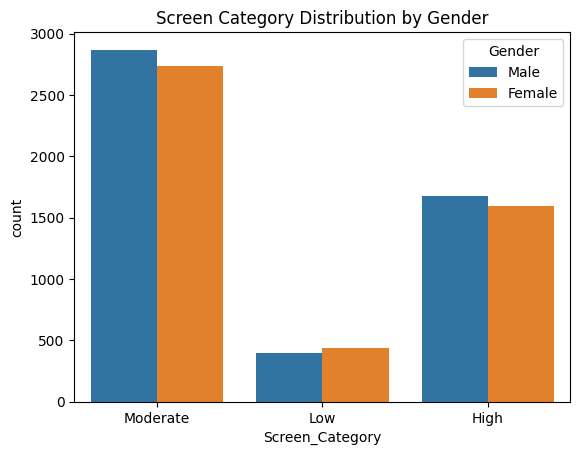

In [107]:
sns.countplot(x="Screen_Category", hue="Gender", data=df)
plt.title("Screen Category Distribution by Gender")
plt.show()


#### 3.Device Preference by Urban/Rural

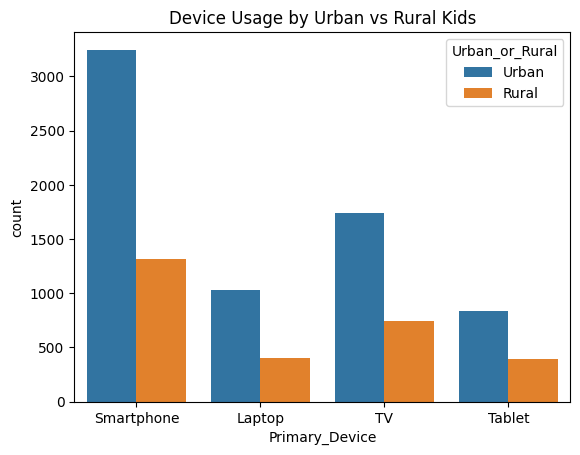

In [110]:
sns.countplot(x="Primary_Device", hue="Urban_or_Rural", data=df)
plt.title("Device Usage by Urban vs Rural Kids")
plt.show()


#### 1) Histogram — Distribution of Avg Daily Screen Time

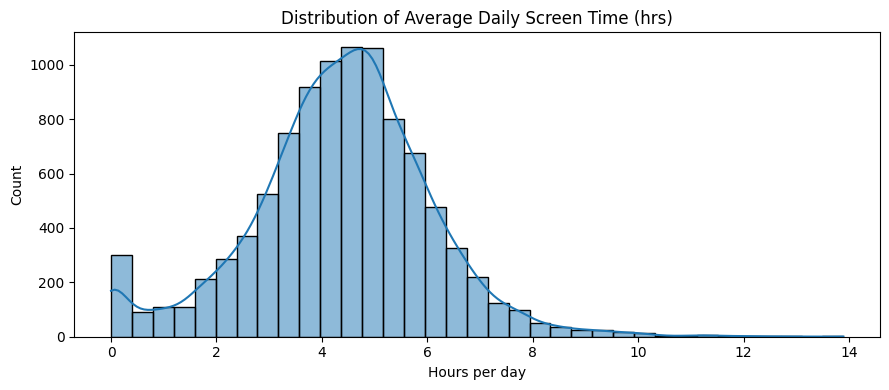

In [113]:
import matplotlib.pyplot as plt, seaborn as sns
plt.figure(figsize=(9,4))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=35, kde=True)
plt.title('Distribution of Average Daily Screen Time (hrs)')
plt.xlabel('Hours per day')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### 2) Boxplot — Screen Time by Age_Group
##### Purpose: compare spreads and medians across age segments.

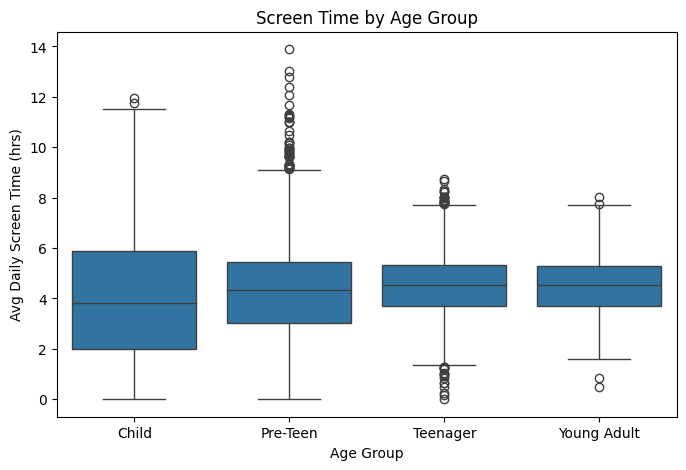

In [116]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Age_Group', y='Avg_Daily_Screen_Time_hr', data=df, order=['Child','Pre-Teen','Teenager','Young Adult'])
plt.title('Screen Time by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.show()

### 3) Bar chart — Mean Screen Time by Primary_Device

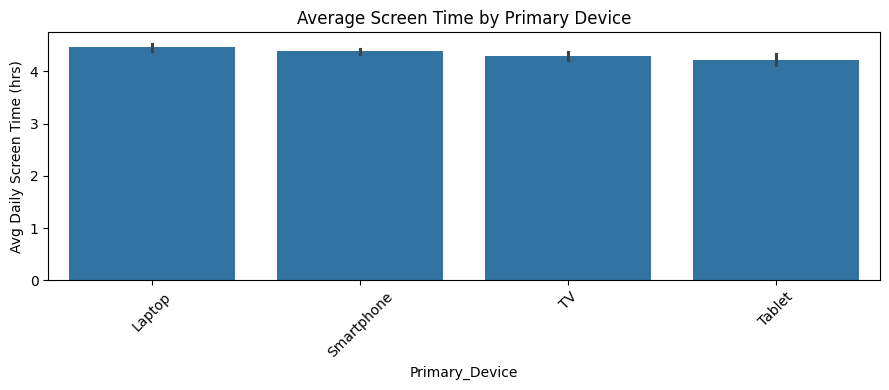

In [119]:
device_order = df.groupby('Primary_Device')['Avg_Daily_Screen_Time_hr'].mean().sort_values(ascending=False).index
plt.figure(figsize=(9,4))
sns.barplot(x='Primary_Device', y='Avg_Daily_Screen_Time_hr', data=df, order=device_order)
plt.xticks(rotation=45)
plt.title('Average Screen Time by Primary Device')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.tight_layout()
plt.show()

#### 4) Grouped bar / Facet — Screen Category counts by Gender and Age_Band

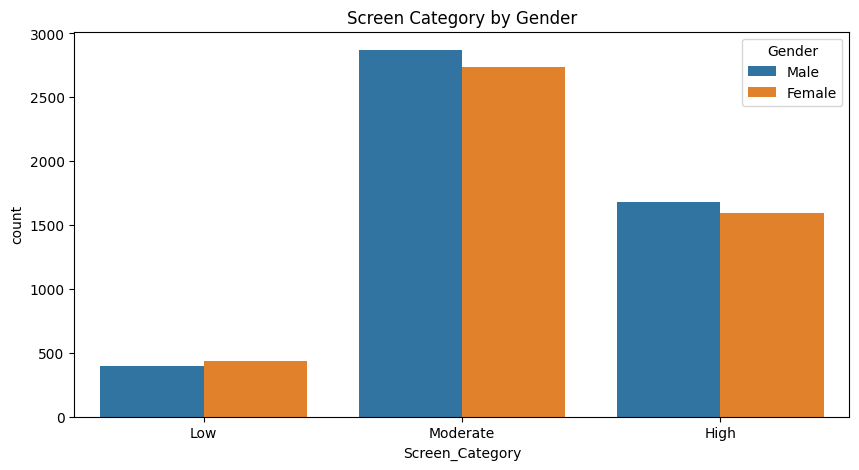

Text(0.5, 1.05, 'Screen Category Distribution by Age Band')

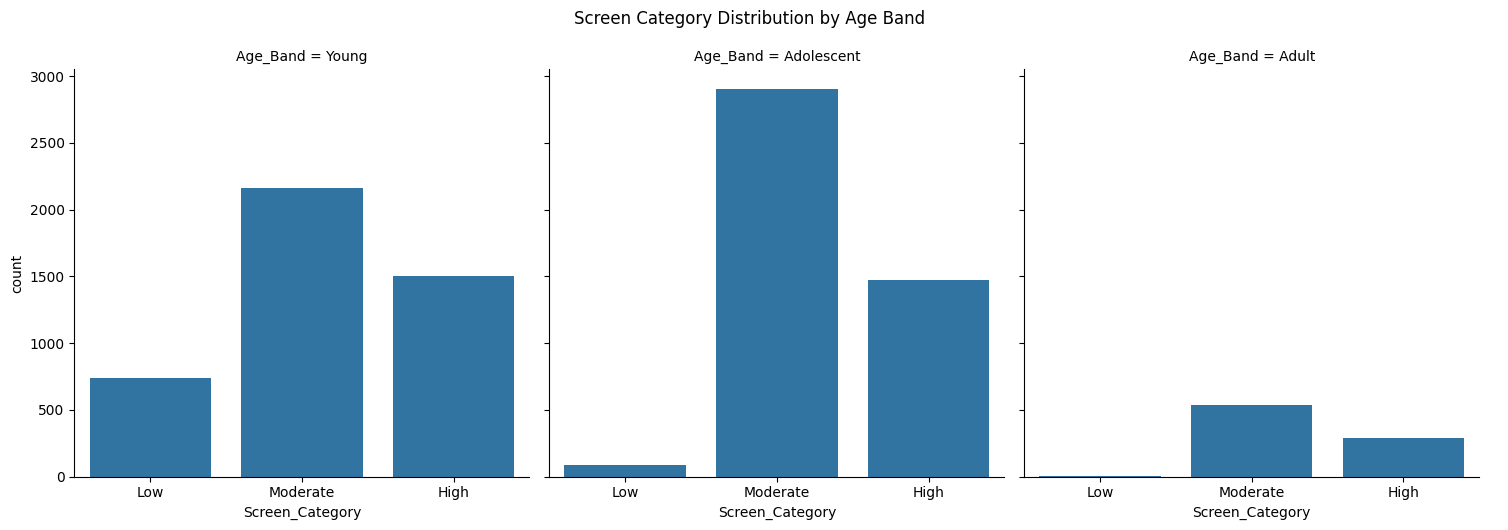

In [122]:
plt.figure(figsize=(10,5))
sns.countplot(x='Screen_Category', hue='Gender', data=df, order=['Low','Moderate','High'])
plt.title('Screen Category by Gender')
plt.show()

# Facet by Age_Band
g = sns.catplot(x='Screen_Category', col='Age_Band', data=df, kind='count', order=['Low','Moderate','High'], col_order=['Young','Adolescent','Adult'])
g.fig.suptitle('Screen Category Distribution by Age Band', y=1.05)


##### 5) Boxplot / Violin — Educational_Percent by Age_Band or Device

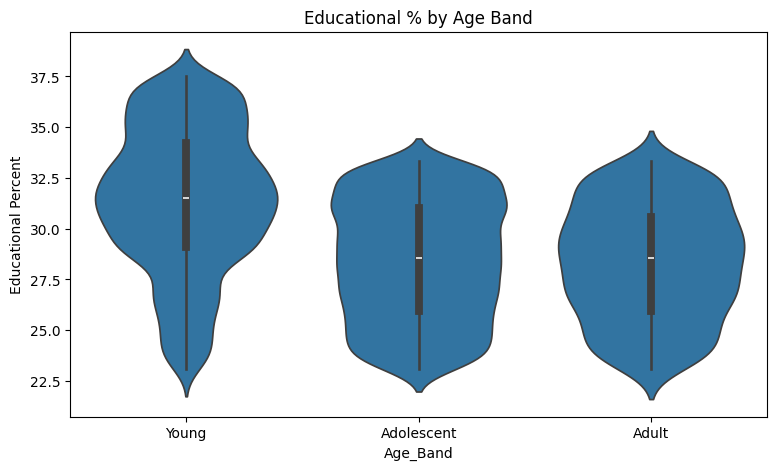

In [125]:
plt.figure(figsize=(9,5))
sns.violinplot(x='Age_Band', y='Educational_Percent', data=df, order=['Young','Adolescent','Adult'])
plt.title('Educational % by Age Band')
plt.ylabel('Educational Percent')

plt.show()


##### 6) Correlation heatmap (numeric features)

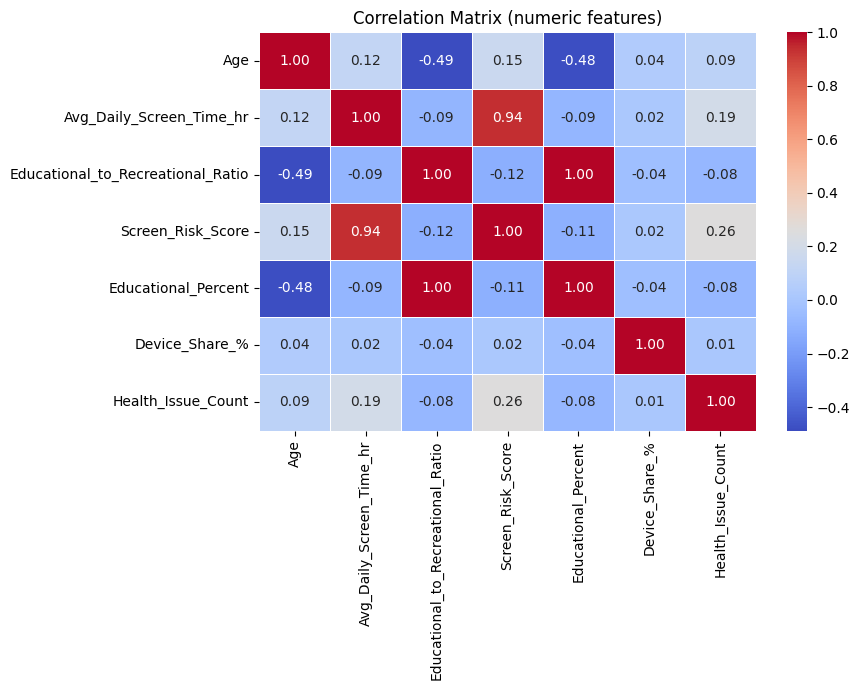

In [128]:
numcols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(9,7))
sns.heatmap(df[numcols].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.4)
plt.title('Correlation Matrix (numeric features)')
plt.tight_layout()
plt.show()

In [130]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# Optional: reduce long text
df['Primary_Device'] = df['Primary_Device'].astype(str)
df['Age_Group'] = df['Age_Group'].astype(str)
df['Gender'] = df['Gender'].astype(str)


ModuleNotFoundError: No module named 'plotly'

In [132]:
!pip install plotly


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 8.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 8.4 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.9 MB 6.8 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.9 MB 5.3 MB/s eta 0:00:02
   -------------- ------------------------- 3.7/9.9 MB 4.3 MB/s eta 0:00:02
   --------------- ------------------------ 3.9/9.9 MB 3.4 MB/s eta 0:00:02
   ---------------- ----------------------- 4.2/9.9 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 4.2/9.9 MB 2.8 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.9 MB 2.5 MB/s eta 0:00:03
   ------------------- -------------------- 4.7/9.9 MB 2.4 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.9 MB 2.3 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.9 MB 2.1 MB/s eta 0:00:03
   ----------------

In [134]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go



# Optional: reduce long text
df['Primary_Device'] = df['Primary_Device'].astype(str)
df['Age_Group'] = df['Age_Group'].astype(str)
df['Gender'] = df['Gender'].astype(str)

### 1.Interactive Histogram – Screen Time Distribution

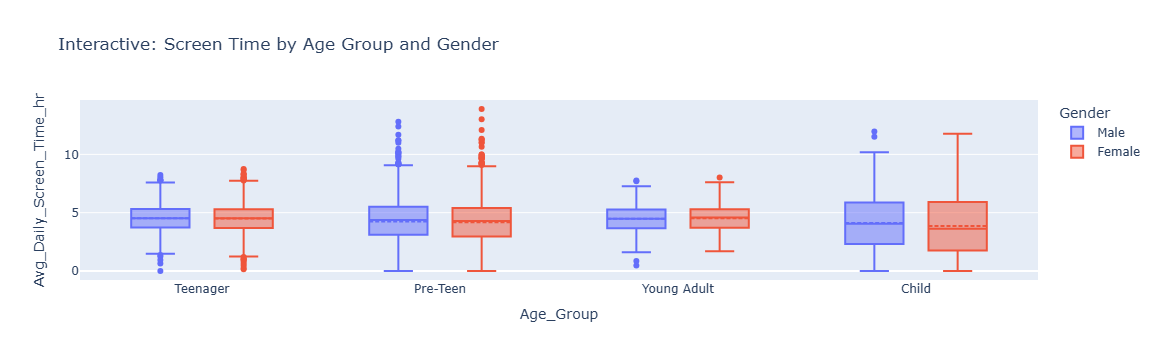

In [137]:
fig = px.box(
    df,
    x="Age_Group",
    y="Avg_Daily_Screen_Time_hr",
    color="Gender",
    title="Interactive: Screen Time by Age Group and Gender",
    hover_data=["Primary_Device", "Urban_or_Rural"]
)
fig.update_traces(boxmean=True)
fig.write_html("Interactive_Box_AgeGender.html")
fig.show()


#### 2.Interactive Box Plot – Screen Time by Age Group and Gender

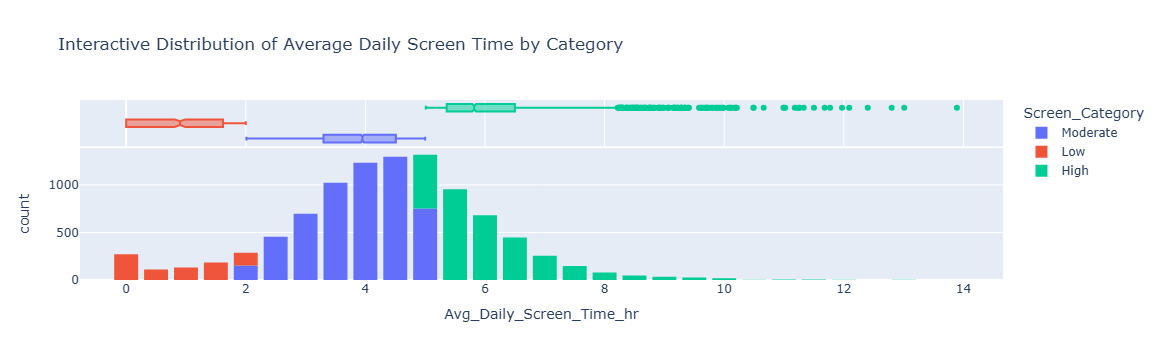

In [140]:
fig = px.histogram(
    df,
    x="Avg_Daily_Screen_Time_hr",
    nbins=30,
    color="Screen_Category",
    marginal="box",
    title="Interactive Distribution of Average Daily Screen Time by Category",
    hover_data=["Age_Group", "Gender"]
)
fig.update_layout(bargap=0.2)
fig.write_html("Interactive_Histogram_ScreenTime.html")
fig.show()


#### 3. Treemap – Device vs Age Group vs Screen Category

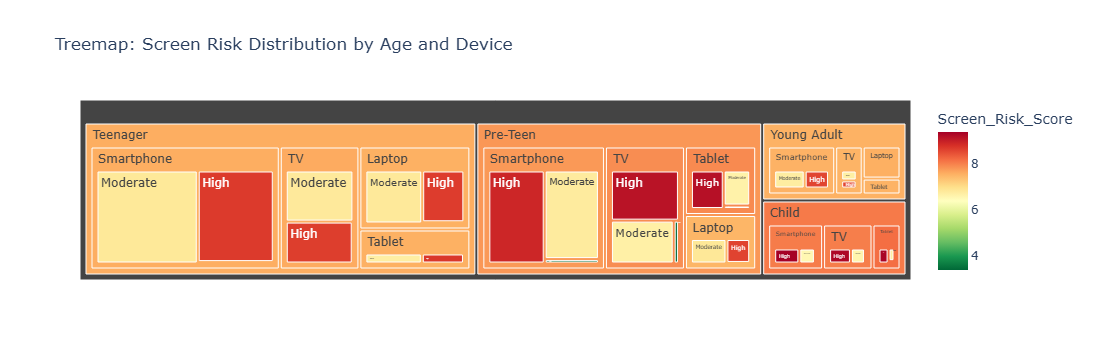

In [148]:
fig = px.treemap(
    df,
    path=["Age_Group", "Primary_Device", "Screen_Category"],
    values="Avg_Daily_Screen_Time_hr",
    color="Screen_Risk_Score",
    color_continuous_scale="RdYlGn_r",
    title="Treemap: Screen Risk Distribution by Age and Device"
)
fig.write_html("Interactive_Treemap_ScreenRisk.html")
fig.show()



#### 4. Bubble Chart – Screen Risk vs Health Issues (by Device & Age)

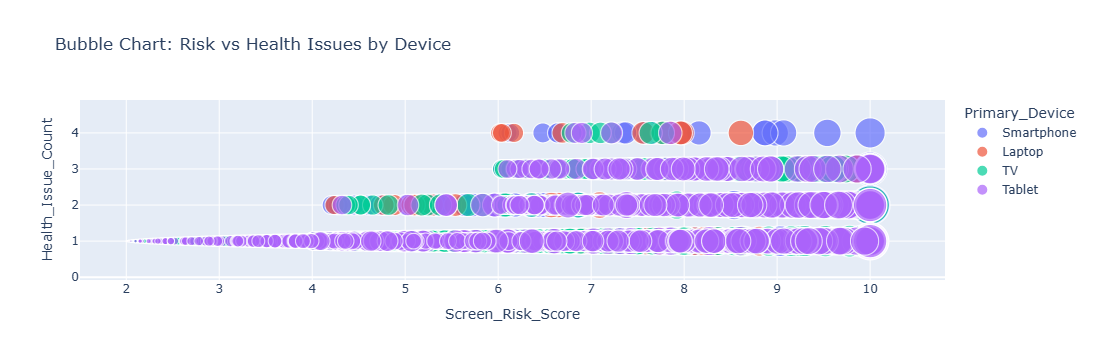

In [146]:
fig = px.scatter(
    df,
    x="Screen_Risk_Score",
    y="Health_Issue_Count",
    size="Avg_Daily_Screen_Time_hr",
    color="Primary_Device",
    hover_name="Age_Group",
    title="Bubble Chart: Risk vs Health Issues by Device",
    size_max=40
)
fig.write_html("Interactive_Bubble_RiskHealth.html")
fig.show()


In [150]:
np.random.seed(42)
df["Day_Type"] = np.random.choice(["Weekday", "Weekend"], size=len(df), p=[0.7, 0.3])

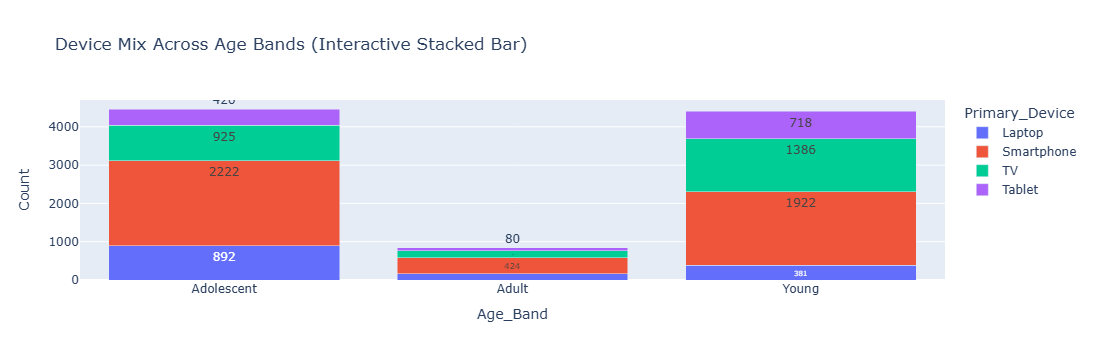

In [152]:


device_mix = df.groupby(["Age_Band", "Primary_Device"]).size().reset_index(name="Count")

fig = px.bar(
    device_mix,
    x="Age_Band",
    y="Count",
    color="Primary_Device",
    title="Device Mix Across Age Bands (Interactive Stacked Bar)",
    text_auto=True
)
fig.update_layout(barmode="stack")
fig.show()


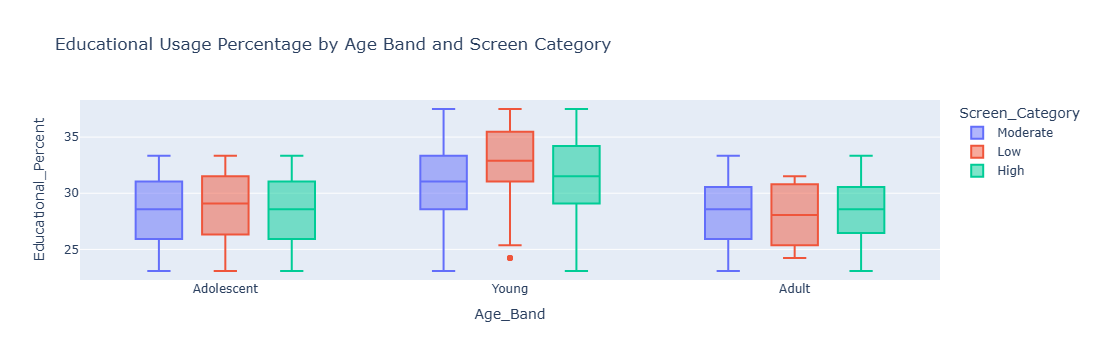

In [154]:
fig = px.box(
    df,
    x="Age_Band",
    y="Educational_Percent",
    color="Screen_Category",
    title="Educational Usage Percentage by Age Band and Screen Category"
)
fig.show()


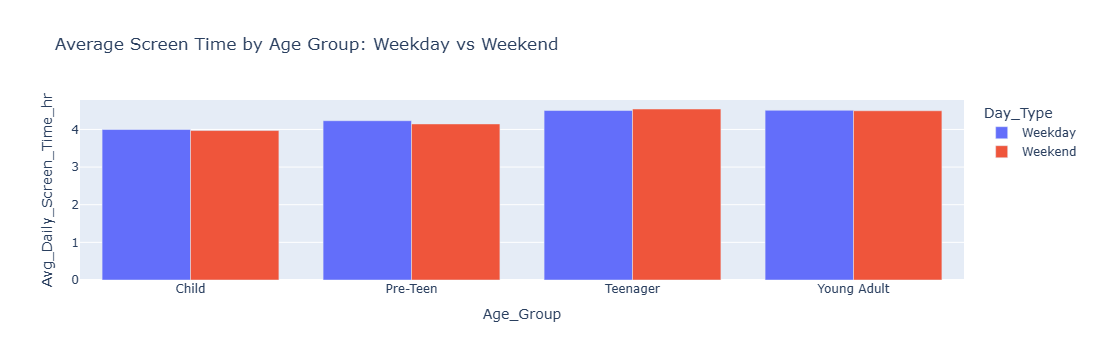

In [156]:
fig = px.bar(
    df.groupby(["Day_Type", "Age_Group"])["Avg_Daily_Screen_Time_hr"].mean().reset_index(),
    x="Age_Group",
    y="Avg_Daily_Screen_Time_hr",
    color="Day_Type",
    barmode="group",
    title="Average Screen Time by Age Group: Weekday vs Weekend"
)
fig.show()

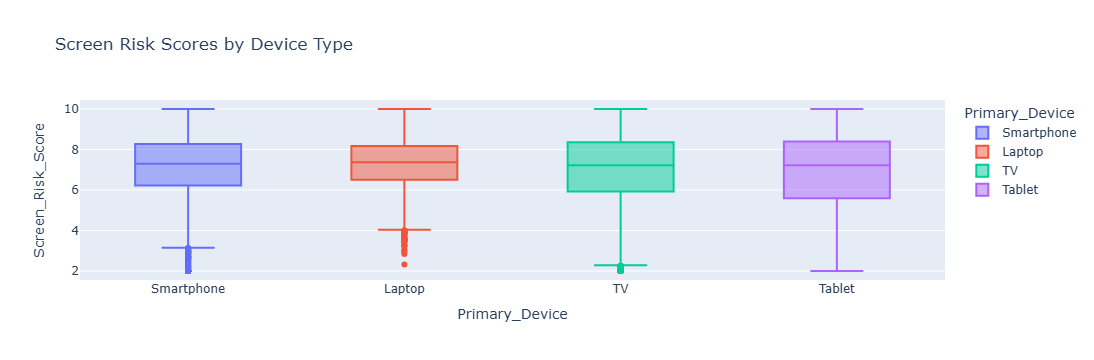

In [158]:
fig = px.box(
    df,
    x="Primary_Device",
    y="Screen_Risk_Score",
    color="Primary_Device",
    title="Screen Risk Scores by Device Type",
)
fig.show()

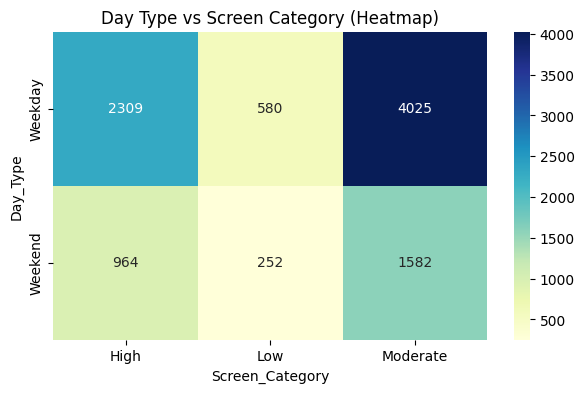

In [160]:
plt.figure(figsize=(7,4))
sns.heatmap(pd.crosstab(df["Day_Type"], df["Screen_Category"]), annot=True, cmap="YlGnBu", fmt='d')
plt.title("Day Type vs Screen Category (Heatmap)")
plt.show()


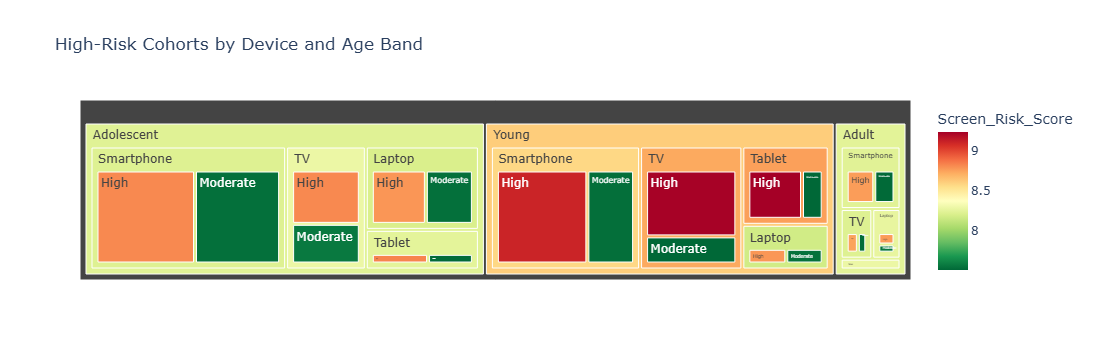

In [162]:
high_risk = df[df["Screen_Risk_Score"] > df["Screen_Risk_Score"].mean()]
fig = px.treemap(
    high_risk,
    path=["Age_Band", "Primary_Device", "Screen_Category"],
    values="Screen_Risk_Score",
    color="Screen_Risk_Score",
    color_continuous_scale="RdYlGn_r",
    title="High-Risk Cohorts by Device and Age Band"
)
fig.show()
